In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Reading the csv file as a dataframe
df1 = pd.read_csv('mental-health-common-problems-borough.csv', encoding='UTF-8')

# Deleting unwanted rows
df = df1.drop(df1.index[32:])

# Deleting unwanted columns
del df['Code']
del df['Population 16-74']
del df['Panic disorder-Estimated cases']
del df['Obsessive compulsive disorder-Estimated cases']
del df['Mixed anxiety depression-Estimated cases']
del df['Generalised anxiety disorder-Estimated cases']
del df['Depressive episode-Estimated cases']
del df['All phobias-Estimated cases']
del df['Any neurotic disorder-Estimated cases']
del df['Area']

# Renaming column headings
df.rename(columns={'Any neurotic disorder-Rates per 1000 population': 'Any neurotic disorder', 'All phobias-Rates per 1000 population': 'All phobias', 'Depressive episode-Rates per 1000 population': 'Depression', 'Generalised anxiety disorder-Rates per 1000 population': 'Anxiety disorder', 'Mixed anxiety depression-Rates per 1000 population': 'Anxiety & Depression', 'Obsessive compulsive disorder-Rates per 1000 population': 'OCD', 'Panic disorder-Rates per 1000 population': 'Panic disorder'}, inplace=True)

# Changing string to numeric
df["Any neurotic disorder"] = pd.to_numeric(df["Any neurotic disorder"])
df["All phobias"] = pd.to_numeric(df["All phobias"])
df["Depression"] = pd.to_numeric(df["Depression"])
df["Anxiety disorder"] = pd.to_numeric(df["Anxiety disorder"])
df["Anxiety & Depression"] = pd.to_numeric(df["Anxiety & Depression"])
df["OCD"] = pd.to_numeric(df["OCD"])
df["Panic disorder"] = pd.to_numeric(df["Panic disorder"])

In [3]:
# Correlations
correl = df.corr(method = 'pearson')
correl

,Any neurotic disorder,All phobias,Depression,Anxiety disorder,Anxiety & Depression,OCD,Panic disorder
Any neurotic disorder,1.000000,0.996714,0.987011,0.976751,0.995575,0.995764,0.990136
All phobias,0.996714,1.000000,0.975665,0.964296,0.996846,0.994086,0.978497
Depression,0.987011,0.975665,1.000000,0.995894,0.968177,0.977514,0.994176
Anxiety disorder,0.976751,0.964296,0.995894,1.000000,0.953151,0.959982,0.991584
Anxiety & Depression,0.995575,0.996846,0.968177,0.953151,1.000000,0.995036,0.975093
OCD,0.995764,0.994086,0.977514,0.959982,0.995036,1.000000,0.978410
Panic disorder,0.990136,0.978497,0.994176,0.991584,0.975093,0.978410,1.000000


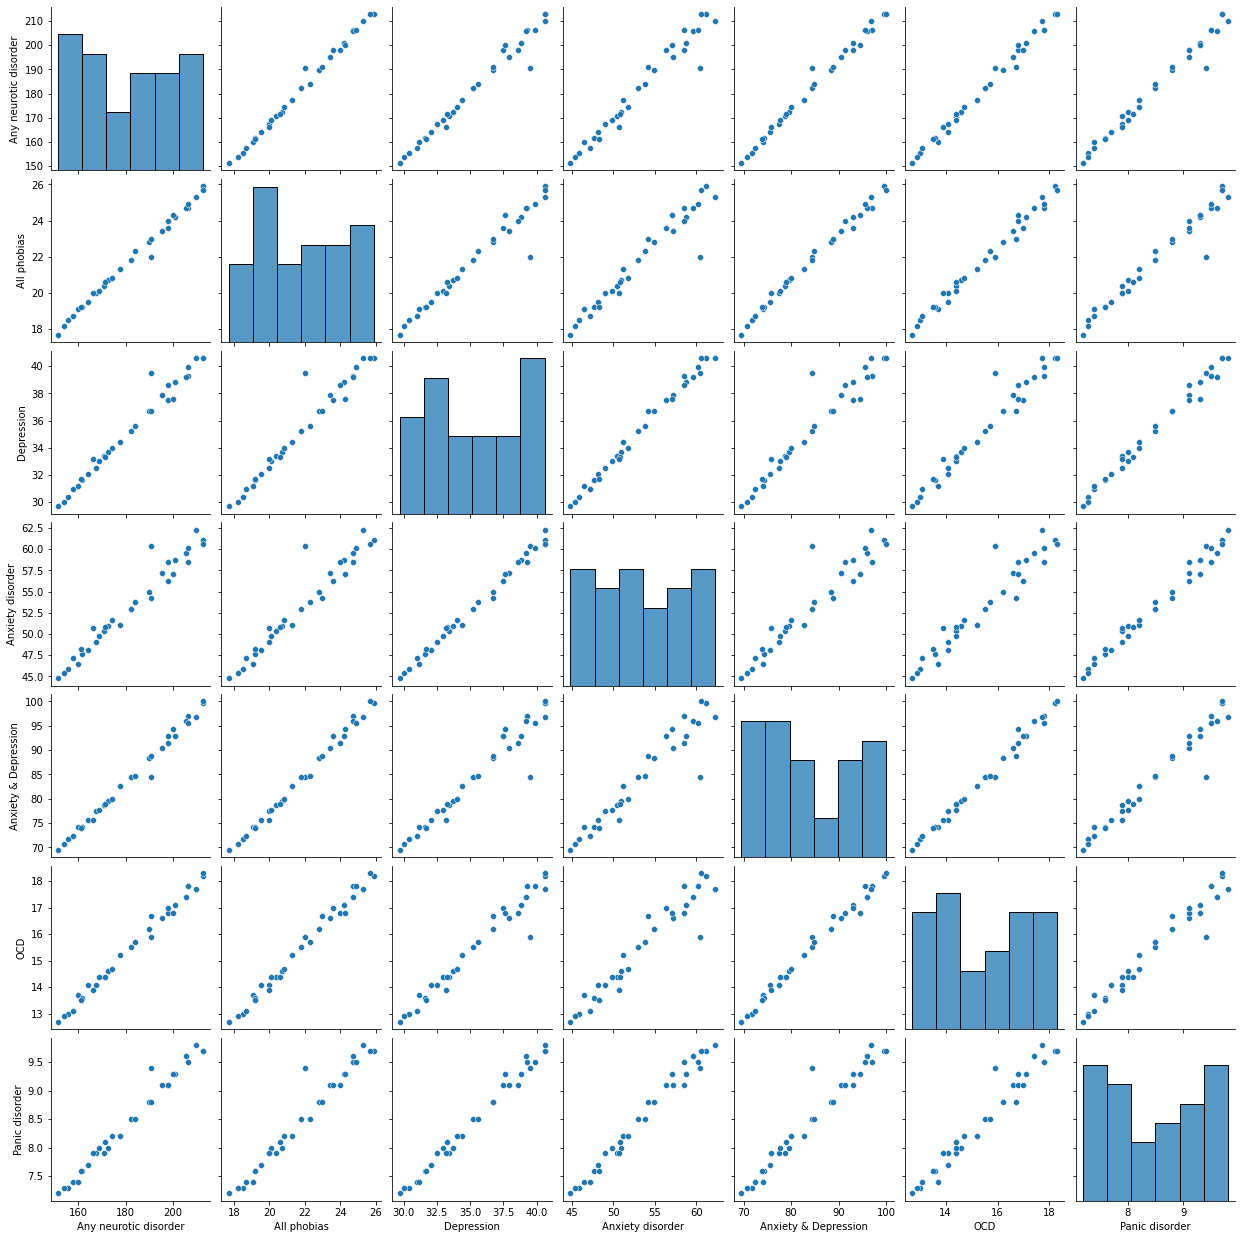

In [7]:
# Creating scatter plots for all mental disorders
plot = sns.pairplot(df) 
plot

In [8]:
plot.fig.savefig('Scatter.png', dpi=300, bbox_inches='tight')